In [1]:
from keras.models import Sequential 
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist

from extra_keras_datasets import emnist

import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [3]:
encoding_dim = 15 
input_img = Input(shape=(784,))
# encoded representation of input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# decoded representation of code 
decoded = Dense(784, activation='sigmoid')(encoded)
# Model which take input image and shows decoded images
autoencoder = Model(input_img, decoded)

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 15)                11775     
                                                                 
 dense_1 (Dense)             (None, 784)               12544     
                                                                 
Total params: 24,319
Trainable params: 24,319
Non-trainable params: 0
_________________________________________________________________


In [4]:
# This model shows encoded images
encoder = Model(input_img, encoded)

# Creating a decoder model
encoded_input = Input(shape=(encoding_dim,))

# last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

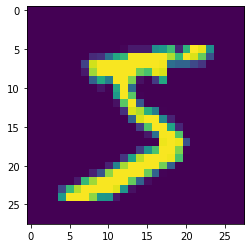

In [6]:
plt.imshow(x_train[0].reshape(28,28))

In [7]:
autoencoder.fit(x_train, x_train,epochs=15,batch_size=256,validation_data=(x_test, x_test))

Epoch 1/15
235/235 [==============================] - 4s 6ms/step - loss: 0.3105 - val_loss: 0.2290
Epoch 2/15
235/235 [==============================] - 1s 6ms/step - loss: 0.2035 - val_loss: 0.1837
Epoch 3/15
235/235 [==============================] - 1s 6ms/step - loss: 0.1746 - val_loss: 0.1641
Epoch 4/15
235/235 [==============================] - 1s 6ms/step - loss: 0.1593 - val_loss: 0.1531
Epoch 5/15
235/235 [==============================] - 1s 5ms/step - loss: 0.1515 - val_loss: 0.1477
Epoch 6/15
235/235 [==============================] - 1s 6ms/step - loss: 0.1473 - val_loss: 0.1443
Epoch 7/15
235/235 [==============================] - 1s 6ms/step - loss: 0.1445 - val_loss: 0.1421
Epoch 8/15
235/235 [==============================] - 2s 7ms/step - loss: 0.1424 - val_loss: 0.1403
Epoch 9/15
235/235 [==============================] - 2s 7ms/step - loss: 0.1407 - val_loss: 0.1387
Epoch 10/15
235/235 [==============================] - 1s 6ms/step - loss: 0.1392 - val_loss: 0.1372

In [8]:
encoded_img = encoder.predict(x_test)

In [9]:
decoded_img = decoder.predict(encoded_img)

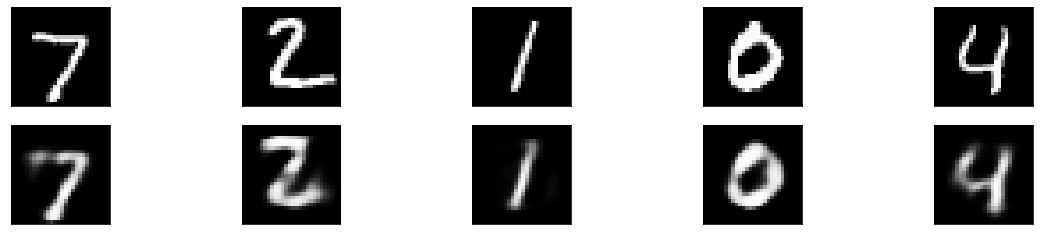

In [10]:
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Check on EMNIST

Extended MNIST (EMNIST) contains digits as well as uppercase and lowercase handwritten letters. EMNIST-Letters contains 145.600 characters across 26 balanced classes (letters only).

In [11]:
(x_train_e, target_train), (x_test_e, target_test) = emnist.load_data(type='letters') # Loading only letters not numbers 

x_test_e = x_test_e.astype('float32') / 255.
x_test_e = x_test_e.reshape((len(x_test_e), np.prod(x_test_e.shape[1:])))

print(x_test_e.shape)

INFO:root:Loading dataset = emnist


(20800, 784)


In [12]:
encoded_img_e = encoder.predict(x_test_e)
decoded_img_e = decoder.predict(encoded_img_e)

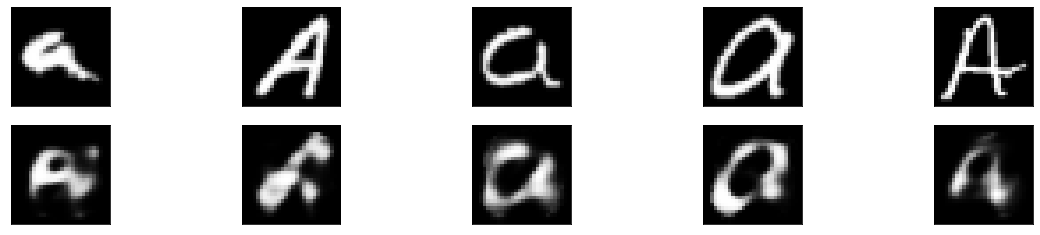

In [13]:
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_e[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(decoded_img_e[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

- As the abobe autoencoder train on hand writing digit and we test on hand writing alphabet so the output is not good, it try to predicts 'small a' as '0' i.e. try to predicts some digits for every alphabet.

### Check on Kuzushiji-MNIST 

Kuzushiji-MNIST is a drop-in replacement for the MNIST dataset: it contains 70,000 28x28 grayscale images of Japanese Kuzushiji characters.

In [14]:
from extra_keras_datasets import kmnist
(x_train_k, target_train), (x_test_k, target_test) = kmnist.load_data(type='kmnist')

x_test_k = x_test_k.astype('float32') / 255.
x_test_k = x_test_k.reshape((len(x_test_k), np.prod(x_test_k.shape[1:])))

print(x_test_k.shape)

INFO:root:Loading dataset = kmnist


(10000, 784)


In [15]:
encoded_img_k = encoder.predict(x_test_k)
decoded_img_k = decoder.predict(encoded_img_k)

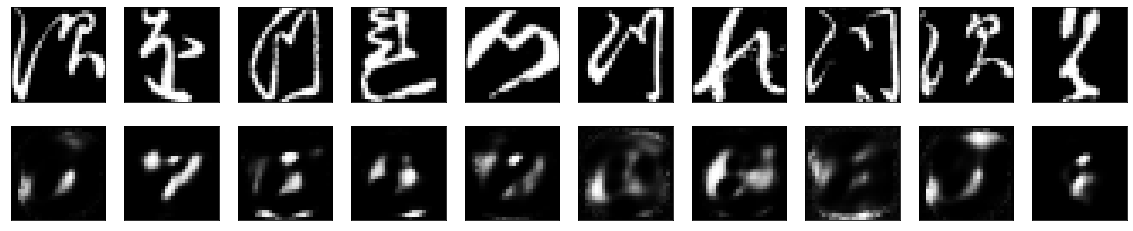

In [16]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_k[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_img_k[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Autoencoder using sequencial model

In [17]:
model = Sequential()

# encoder network
model.add(Conv2D(30, 3, activation= 'relu', padding='same', input_shape = (28,28,1)))
model.add(MaxPooling2D(2, padding= 'same'))
model.add(Conv2D(15, 3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(2, padding= 'same'))

#decoder network
model.add(Conv2D(15, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(30, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) # output layer

model.compile(optimizer= 'adam', loss = 'binary_crossentropy')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 30)        300       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 15)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 15)          2040      
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 15)       0

###### Number of parameter calculation:

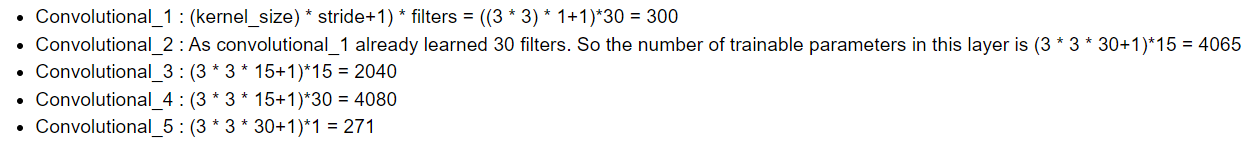

In [18]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [19]:
model.fit(x_train, x_train, epochs=15, batch_size=128, validation_data=(x_test, x_test))

Epoch 1/15
469/469 [==============================] - 100s 211ms/step - loss: 0.1190 - val_loss: 0.0790
Epoch 2/15
469/469 [==============================] - 91s 194ms/step - loss: 0.0771 - val_loss: 0.0743
Epoch 3/15
469/469 [==============================] - 90s 192ms/step - loss: 0.0739 - val_loss: 0.0722
Epoch 4/15
469/469 [==============================] - 94s 200ms/step - loss: 0.0723 - val_loss: 0.0711
Epoch 5/15
469/469 [==============================] - 89s 189ms/step - loss: 0.0712 - val_loss: 0.0705
Epoch 6/15
469/469 [==============================] - 84s 180ms/step - loss: 0.0705 - val_loss: 0.0695
Epoch 7/15
469/469 [==============================] - 83s 178ms/step - loss: 0.0699 - val_loss: 0.0691
Epoch 8/15
469/469 [==============================] - 93s 199ms/step - loss: 0.0694 - val_loss: 0.0687
Epoch 9/15
469/469 [==============================] - 89s 191ms/step - loss: 0.0690 - val_loss: 0.0683
Epoch 10/15
469/469 [==============================] - 94s 200ms/step - 

In [20]:
pred = model.predict(x_test)

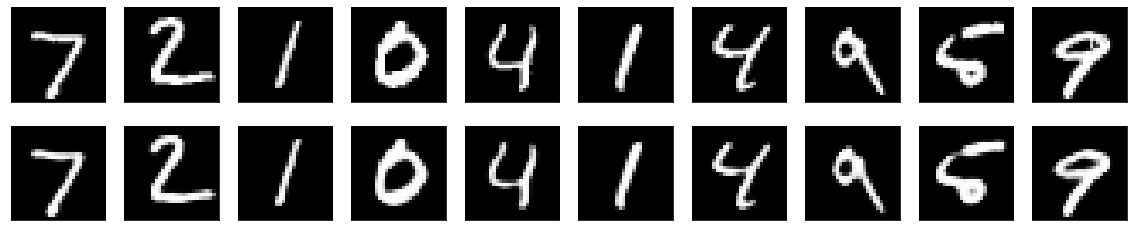

In [21]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Introduce noise in the images

In [22]:
noise_factor = 0.7
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

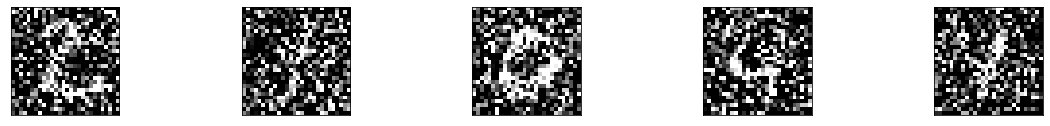

In [23]:
plt.figure(figsize=(20, 2))
for i in range(1, 5 + 1):
    ax = plt.subplot(1, 5, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [24]:
model = Sequential()
# encoder network
model.add(Conv2D(35, 3, activation= 'relu', padding='same', input_shape = (28,28,1)))
model.add(MaxPooling2D(2, padding= 'same'))
model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(2, padding= 'same'))
#decoder network
model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(35, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) # output layer

model.compile(optimizer= 'adam', loss = 'binary_crossentropy')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 35)        350       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 35)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 25)        7900      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 25)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 25)          5650      
                                                                 
 up_sampling2d_2 (UpSampling  (None, 14, 14, 25)      

In [25]:
history = model.fit(x_train_noisy, x_train, epochs=15, batch_size=128, validation_data=(x_test_noisy, x_test))

Epoch 1/15
469/469 [==============================] - 108s 228ms/step - loss: 0.2028 - val_loss: 0.1517
Epoch 2/15
469/469 [==============================] - 107s 228ms/step - loss: 0.1477 - val_loss: 0.1418
Epoch 3/15
469/469 [==============================] - 107s 229ms/step - loss: 0.1405 - val_loss: 0.1368
Epoch 4/15
469/469 [==============================] - 107s 227ms/step - loss: 0.1366 - val_loss: 0.1342
Epoch 5/15
469/469 [==============================] - 107s 229ms/step - loss: 0.1342 - val_loss: 0.1320
Epoch 6/15
469/469 [==============================] - 107s 229ms/step - loss: 0.1325 - val_loss: 0.1308
Epoch 7/15
469/469 [==============================] - 106s 227ms/step - loss: 0.1309 - val_loss: 0.1291
Epoch 8/15
469/469 [==============================] - 106s 227ms/step - loss: 0.1295 - val_loss: 0.1279
Epoch 9/15
469/469 [==============================] - 107s 228ms/step - loss: 0.1283 - val_loss: 0.1269
Epoch 10/15
469/469 [==============================] - 106s 227m

In [26]:
pred = model.predict(x_test_noisy)

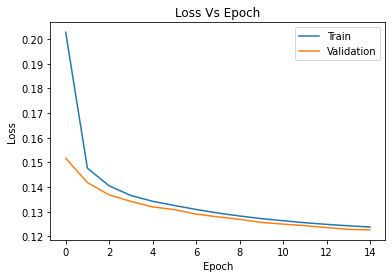

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

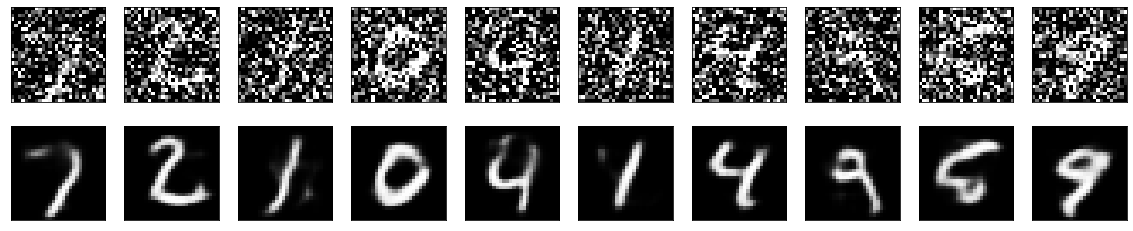

In [28]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()